In [736]:
import numpy as np
import pandas as pd
import sqlalchemy
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

conn = sqlite3.connect('kinara_assessment_20181008.db')

loan_data = pd.read_sql_query("SELECT * FROM loan_information", conn)
scores_data = pd.read_sql_query("SELECT * FROM scores_information", conn)
disbursements_data=pd.read_sql_query("SELECT * FROM disbursements_information", conn)
ent_data=pd.read_sql_query("SELECT * FROM enteprise_information", conn)

In [737]:
loan_data.head()

,loan_id,account_number,customer_id,enterprise_id,screening_date,product_code,hub_id
0,5692,TLMFS0000055,17850,6278,2017-03-07,TLMFS,46
1,6190,TLWCU0001219,17857,6280,2017-03-07,TLWCU,32
2,6191,TLAPS0000292,9481,2916,2017-03-07,TLAPS,32
3,6192,LCRIU0000019,6597,32,2017-03-10,LCRIU,32
4,6193,LCRIU0000020,9732,3167,2017-03-13,LCRIU,32


In [738]:
ent_data.head()


,enterprise_id,business_type,business_activity,business_sector
0,4,Manufacturing,Sales,Printing
1,7,Manufacturing,Job Work & Sales,Fabrication
2,8,Manufacturing,Job Work & Sales,Auto Components
3,16,Manufacturing,Job Work & Sales,Fabrication
4,19,Manufacturing,Sales,Leather


In [739]:
scores_data.head()

,loan_id,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP
0,5692,32,Cash & Non Banked,0
1,6190,35,Cash & Non Banked,0
2,6191,32,Cash & Non Banked,0
3,6193,39,Cash & Non Banked,548
4,8581,36,Cash & Non Banked,0


In [740]:
disbursements_data.head()

,account_number,net_disbursement_magnitude,transaction_Date
0,TLWCS0000594,276196.0,2017-02-28
1,TLWCS0000609,731482.0,2017-02-28
2,TLMFS0000046,915017.0,2017-02-28
3,TLWCS0000656,924979.0,2017-02-28
4,TLAPS0000238,1343871.0,2017-02-28


In [741]:
data1=pd.merge(loan_data,ent_data, on='enterprise_id',how='outer')

In [742]:
data1.head()

,loan_id,account_number,customer_id,enterprise_id,screening_date,product_code,hub_id,business_type,business_activity,business_sector
0,5692,TLMFS0000055,17850,6278,2017-03-07,TLMFS,46,Manufacturing,Job Work,Auto Components
1,6190,TLWCU0001219,17857,6280,2017-03-07,TLWCU,32,Trading,Retail,Book Stores
2,6191,TLAPS0000292,9481,2916,2017-03-07,TLAPS,32,Manufacturing,Sales,Electricals
3,6192,LCRIU0000019,6597,32,2017-03-10,LCRIU,32,Manufacturing,Job Work & Sales,Auto Components
4,9912,LCRIU0000028,6597,32,2017-04-01,LCRIU,18,Manufacturing,Job Work & Sales,Auto Components


In [743]:
def perc_missing(x):
    return(x.isnull().sum()/len(x)*100)

In [744]:
perc_missing(data1)

loan_id               0.000000
account_number       41.885800
customer_id           0.000000
enterprise_id         0.000000
screening_date        0.000000
product_code         39.669421
hub_id                0.000000
business_type         0.000000
business_activity     0.000000
business_sector       0.075131
dtype: float64

In [745]:
cols = ['account_number']
data1[cols] = data1[cols].replace(np.nan,0)

In [746]:
perc_missing(data1)

loan_id               0.000000
account_number        0.000000
customer_id           0.000000
enterprise_id         0.000000
screening_date        0.000000
product_code         39.669421
hub_id                0.000000
business_type         0.000000
business_activity     0.000000
business_sector       0.075131
dtype: float64

In [747]:
data1.head()

,loan_id,account_number,customer_id,enterprise_id,screening_date,product_code,hub_id,business_type,business_activity,business_sector
0,5692,TLMFS0000055,17850,6278,2017-03-07,TLMFS,46,Manufacturing,Job Work,Auto Components
1,6190,TLWCU0001219,17857,6280,2017-03-07,TLWCU,32,Trading,Retail,Book Stores
2,6191,TLAPS0000292,9481,2916,2017-03-07,TLAPS,32,Manufacturing,Sales,Electricals
3,6192,LCRIU0000019,6597,32,2017-03-10,LCRIU,32,Manufacturing,Job Work & Sales,Auto Components
4,9912,LCRIU0000028,6597,32,2017-04-01,LCRIU,18,Manufacturing,Job Work & Sales,Auto Components


In [748]:
data1['loan_status']=np.where(data1['account_number']==0,data1['account_number'],1)

In [749]:
data1.head()

,loan_id,account_number,customer_id,enterprise_id,screening_date,product_code,hub_id,business_type,business_activity,business_sector,loan_status
0,5692,TLMFS0000055,17850,6278,2017-03-07,TLMFS,46,Manufacturing,Job Work,Auto Components,1
1,6190,TLWCU0001219,17857,6280,2017-03-07,TLWCU,32,Trading,Retail,Book Stores,1
2,6191,TLAPS0000292,9481,2916,2017-03-07,TLAPS,32,Manufacturing,Sales,Electricals,1
3,6192,LCRIU0000019,6597,32,2017-03-10,LCRIU,32,Manufacturing,Job Work & Sales,Auto Components,1
4,9912,LCRIU0000028,6597,32,2017-04-01,LCRIU,18,Manufacturing,Job Work & Sales,Auto Components,1


In [750]:
data2=pd.merge(data1,scores_data, on='loan_id',how='inner')

In [751]:
col = ['ManagCBscoreui_APP','ManagAgeui_APP','product_code','BusinFormalityOfTheBusinessui']
data2[col] = data2[col].replace(np.nan,0)

In [752]:
data2.head()

,loan_id,account_number,customer_id,enterprise_id,screening_date,product_code,hub_id,business_type,business_activity,business_sector,loan_status,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP
0,5692,TLMFS0000055,17850,6278,2017-03-07,TLMFS,46,Manufacturing,Job Work,Auto Components,1,32,Cash & Non Banked,0
1,6190,TLWCU0001219,17857,6280,2017-03-07,TLWCU,32,Trading,Retail,Book Stores,1,35,Cash & Non Banked,0
2,6191,TLAPS0000292,9481,2916,2017-03-07,TLAPS,32,Manufacturing,Sales,Electricals,1,32,Cash & Non Banked,0
3,9912,LCRIU0000028,6597,32,2017-04-01,LCRIU,18,Manufacturing,Job Work & Sales,Auto Components,1,37,Cash & Non Banked,826
4,10500,LCRIU0000032,6597,32,2017-04-27,LCRIU,18,Manufacturing,Job Work & Sales,Auto Components,1,37,Cash & Non Banked,826


In [753]:
data2.shape

(2033, 14)

In [754]:
data2['product_code']  = data2.product_code.replace(['TLMFS', 'TLWCU', 'TLAPS', 'LCRIU', 'TLWCS', 'LCRDS', 'ICWCS',
       'None', 'LCRDU', 'ICAPS', 'ICMFS', 'TLBDU', 'ICBDS', 'TLBDS'], ['secured_product', 'unsecured_product','secured_product','unsecured_product','secured_product','secured_product','secured_product','None','unsecured_product','secured_product','secured_product','unsecured_product','secured_product','secured_product'])

In [755]:
data2['loan_status']  = data2.loan_status.replace([1,0], ['Loan_Accepted', 'Loan_Rejected'])

In [756]:
data2.head(10)

,loan_id,account_number,customer_id,enterprise_id,screening_date,product_code,hub_id,business_type,business_activity,business_sector,loan_status,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP
0,5692,TLMFS0000055,17850,6278,2017-03-07,secured_product,46,Manufacturing,Job Work,Auto Components,Loan_Accepted,32,Cash & Non Banked,0
1,6190,TLWCU0001219,17857,6280,2017-03-07,unsecured_product,32,Trading,Retail,Book Stores,Loan_Accepted,35,Cash & Non Banked,0
2,6191,TLAPS0000292,9481,2916,2017-03-07,secured_product,32,Manufacturing,Sales,Electricals,Loan_Accepted,32,Cash & Non Banked,0
3,9912,LCRIU0000028,6597,32,2017-04-01,unsecured_product,18,Manufacturing,Job Work & Sales,Auto Components,Loan_Accepted,37,Cash & Non Banked,826
4,10500,LCRIU0000032,6597,32,2017-04-27,unsecured_product,18,Manufacturing,Job Work & Sales,Auto Components,Loan_Accepted,37,Cash & Non Banked,826
5,6193,LCRIU0000020,9732,3167,2017-03-13,unsecured_product,32,Manufacturing,Job Work,Auto Components,Loan_Accepted,39,Cash & Non Banked,548
6,9919,LCRIU0000031,9732,3167,2017-04-04,unsecured_product,18,Manufacturing,Job Work,Auto Components,Loan_Accepted,39,Cash & Non Banked,548
7,8581,TLAPS0000238,17643,6209,2017-03-02,secured_product,26,Manufacturing,Job Work,Machine Components,Loan_Accepted,36,Cash & Non Banked,0
8,8582,TLMFS0000046,7010,445,2017-03-02,secured_product,84,Manufacturing,Sales,Auto Components,Loan_Accepted,48,Cash & Non Banked,0
9,8584,TLAPS0000270,17639,6208,2017-03-02,secured_product,32,Manufacturing,Job Work,Auto Components,Loan_Accepted,35,Invoice & Banked,584


In [757]:
data2['ManagCBscoreui_APP']=data2.ManagCBscoreui_APP.astype(int)
data2['ManagAgeui_APP']=data2.ManagAgeui_APP.astype(int)


In [758]:
data2['ManagCBscoreui_APP']=np.where(data2['ManagCBscoreui_APP'].between(1,630),1,data2['ManagCBscoreui_APP'])
data2['ManagCBscoreui_APP']=np.where(data2['ManagCBscoreui_APP'].between(630,689),2,data2['ManagCBscoreui_APP'])

data2['ManagCBscoreui_APP']=np.where(data2['ManagCBscoreui_APP'].between(689,719),3,data2['ManagCBscoreui_APP'])
data2['ManagCBscoreui_APP']=np.where(data2['ManagCBscoreui_APP']>719,4,data2['ManagCBscoreui_APP'])


In [759]:
data2['ManagCBscoreui_APP']  = data2.ManagCBscoreui_APP.replace([1,2,3,4], ['Bad credit',' Fair credit','Good credit','Excellent credit'])

In [760]:
data2.ManagCBscoreui_APP.unique()

array([0, 'Excellent credit', 'Bad credit', 'Good credit', ' Fair credit'],
      dtype=object)

In [761]:
data2['ManagAgeui_APP']=np.where(data2['ManagAgeui_APP'].between(1,20),1,data2['ManagAgeui_APP'])
data2['ManagAgeui_APP']=np.where(data2['ManagAgeui_APP'].between(21,35),2,data2['ManagAgeui_APP'])

data2['ManagAgeui_APP']=np.where(data2['ManagAgeui_APP'].between(36,50),3,data2['ManagAgeui_APP'])
data2['ManagAgeui_APP']=np.where(data2['ManagAgeui_APP'].between(51,70),4,data2['ManagAgeui_APP'])
data2['ManagAgeui_APP']=np.where(data2['ManagAgeui_APP'].between(71,98),5,data2['ManagAgeui_APP'])


In [762]:
data2['ManagAgeui_APP']  = data2.ManagAgeui_APP.replace([1,2,3,4,5], ['20 & Below','21-35','36-50','51-70','70 & Above'])

In [763]:
data2.ManagAgeui_APP.unique()

array(['21-35', '36-50', '51-70', 0, '20 & Below'], dtype=object)

In [764]:
data2.head(5)

,loan_id,account_number,customer_id,enterprise_id,screening_date,product_code,hub_id,business_type,business_activity,business_sector,loan_status,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP
0,5692,TLMFS0000055,17850,6278,2017-03-07,secured_product,46,Manufacturing,Job Work,Auto Components,Loan_Accepted,21-35,Cash & Non Banked,0
1,6190,TLWCU0001219,17857,6280,2017-03-07,unsecured_product,32,Trading,Retail,Book Stores,Loan_Accepted,21-35,Cash & Non Banked,0
2,6191,TLAPS0000292,9481,2916,2017-03-07,secured_product,32,Manufacturing,Sales,Electricals,Loan_Accepted,21-35,Cash & Non Banked,0
3,9912,LCRIU0000028,6597,32,2017-04-01,unsecured_product,18,Manufacturing,Job Work & Sales,Auto Components,Loan_Accepted,36-50,Cash & Non Banked,Excellent credit
4,10500,LCRIU0000032,6597,32,2017-04-27,unsecured_product,18,Manufacturing,Job Work & Sales,Auto Components,Loan_Accepted,36-50,Cash & Non Banked,Excellent credit


In [765]:
data2.shape

(2033, 14)

#### Data Structure 

In [766]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2033 entries, 0 to 2032
Data columns (total 14 columns):
loan_id                          2033 non-null int64
account_number                   2033 non-null object
customer_id                      2033 non-null int64
enterprise_id                    2033 non-null int64
screening_date                   2033 non-null object
product_code                     2033 non-null object
hub_id                           2033 non-null int64
business_type                    2033 non-null object
business_activity                2033 non-null object
business_sector                  2033 non-null object
loan_status                      2033 non-null object
ManagAgeui_APP                   2033 non-null object
BusinFormalityOfTheBusinessui    2033 non-null object
ManagCBscoreui_APP               2033 non-null object
dtypes: int64(4), object(10)
memory usage: 238.2+ KB


In [767]:
perc_missing(data2)

loan_id                          0.0
account_number                   0.0
customer_id                      0.0
enterprise_id                    0.0
screening_date                   0.0
product_code                     0.0
hub_id                           0.0
business_type                    0.0
business_activity                0.0
business_sector                  0.0
loan_status                      0.0
ManagAgeui_APP                   0.0
BusinFormalityOfTheBusinessui    0.0
ManagCBscoreui_APP               0.0
dtype: float64

#### Data Description For Continous Variable

In [768]:
data2[['loan_id', 'hub_id', 'customer_id','enterprise_id']].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,2033.0,9937.072307,872.658216,5692.0,9260.0,9899.0,10600.0,22041.0
hub_id,2033.0,28.124939,17.057283,3.0,17.0,26.0,34.0,97.0
customer_id,2033.0,18986.352189,5423.784366,6569.0,18287.0,20482.0,22707.0,54913.0
enterprise_id,2033.0,6446.708805,2340.011957,4.0,6426.0,7201.0,7949.0,18870.0


Observation

We observe from the above table :

For the following variables mean is more than 50% percentile or median indicating the indicating the distribution is skewed to the right:

1) loan_id 2) hub_id

For the following variables mean is less than the 50% percentile or median indicating the distribution is skewed to the left:

1) cutomer_id 

For the following variables mean is almost equal to 50% percentile or median indicating the distribution is almost normal distribution:
1) 2) enterprise_id 

In [769]:
data=pd.merge(data2,disbursements_data, on='account_number',how='inner')

/Users/sanaam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sanaam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sanaam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'boxplot for customer_id')

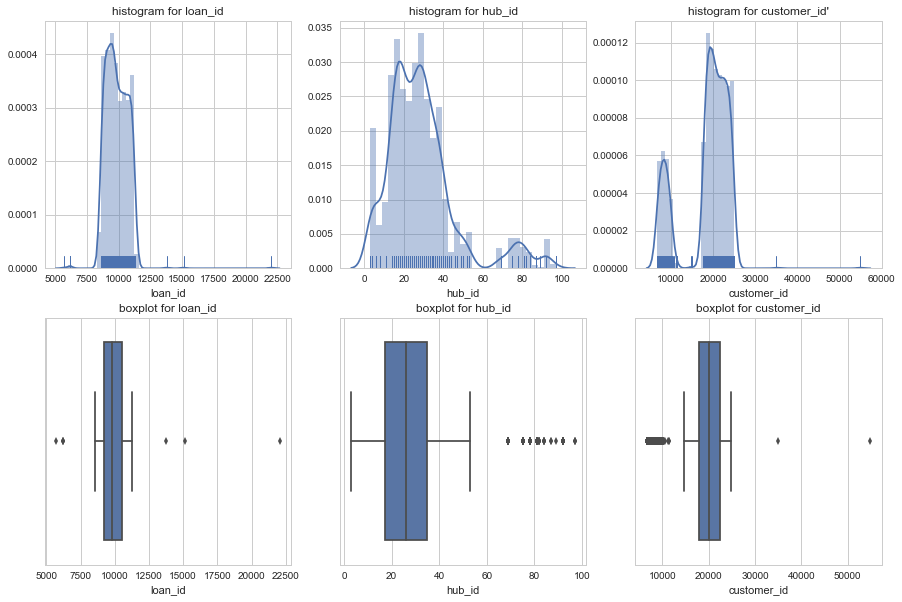

In [770]:
plt.figure(figsize = (15,10))
plt.subplot(231)
sns.distplot(data['loan_id'],rug=True)
plt.title("histogram for loan_id")
plt.subplot(234)
sns.boxplot(data.loan_id)
plt.title("boxplot for loan_id")

plt.subplot(232)
sns.distplot(data['hub_id'],rug=True)
plt.title("histogram for hub_id")
plt.subplot(235)
sns.boxplot(data.hub_id)
plt.title("boxplot for hub_id")


plt.subplot(233)
sns.distplot(data['customer_id'],rug=True)
plt.title("histogram for customer_id'")
plt.subplot(236)
sns.boxplot(data.customer_id)
plt.title("boxplot for customer_id")



Observation

1)The shape of the loan_id histogram looks almost normal distribution with few outliers

2)The shape of the hub_id histogram looks slightly skewed to the right with many outliers.

3)The shape of the Customer_id histogram looks skewed to the left with many outliers.


/Users/sanaam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'boxplot for enterprise_id')

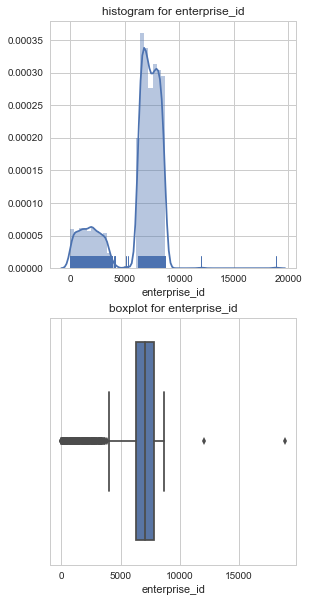

In [771]:
plt.figure(figsize = (15,10))
plt.subplot(231)
sns.distplot(data['enterprise_id'],rug=True)
plt.title("histogram for enterprise_id")
plt.subplot(234)
sns.boxplot(data.enterprise_id)
plt.title("boxplot for enterprise_id")

Observation

1)The shape of the enterprise_id histogram looks almost normal distribution with many outliers

#### Data Description For Categorical Variable

In [772]:
data.describe(include = [np.object]).T

,count,unique,top,freq
account_number,1571,1541,TLAPS0000321,2
screening_date,1571,87,2017-03-20,53
product_code,1571,2,unsecured_product,893
business_type,1571,3,Manufacturing,1052
business_activity,1571,7,Job Work & Sales,477
business_sector,1571,34,Auto Components,229
loan_status,1571,1,Loan_Accepted,1571
ManagAgeui_APP,1571,5,36-50,750
BusinFormalityOfTheBusinessui,1571,4,Cash & Non Banked,1019
ManagCBscoreui_APP,1571,5,Excellent credit,971


In [773]:
data2.ManagCBscoreui_APP.unique()

array([0, 'Excellent credit', 'Bad credit', 'Good credit', ' Fair credit'],
      dtype=object)

#### Absence of multicollinearity
#### Let us find the correlation among numerical variables

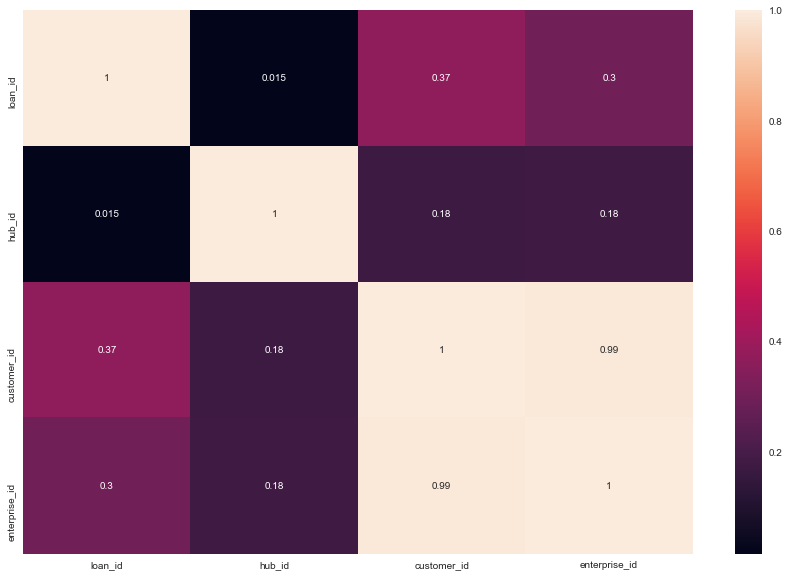

In [774]:
plt.figure(figsize=(15,10));
sns.heatmap(data[['loan_id', 'hub_id', 'customer_id','enterprise_id']].corr(), annot=True);



Observation

The correlation between pair of predictor variables (customer_id & enterprise_id) is highest correlation among them is 0.99 .




Grouped Bar Chart For Categorical Variables

Input:

1) Data Frame

2) Column name of the predictor variable selected

3) Label for the predictor variable

4) Title for the grouped bar chart

Output:

1) Cross tab with count and row percentages

2) Grouped Bar chart


In [775]:
def draw_barplot(df, X, xlab, title):
    
    x       =   df[X]
    loan_statu     =   df['loan_status']

    ct = pd.crosstab(df[X], df['loan_status'])
    print("\n Cross tab with count\n")
    print(ct)

    ### Cross tab with row percentages
    print("\n Cross tab with row % \n")
    ct1 = pd.crosstab(df[X], df['loan_status'], normalize='index').round(4)*100
    print(ct1)

    # now stack and reset
    stacked = ct.stack().reset_index().rename(columns={0:'value'})

    # plot grouped bar chart
    ax = sns.barplot(x = stacked[X], y = stacked.value, hue=stacked.loan_status)
    ax.set_title(title)    
    plt.show()
    
                     
                    


#### Cross tab - Type Vs FeedBack


 Cross tab with count

loan_status        Loan_Accepted  Loan_Rejected
product_code                                   
0                              0            432
secured_product              650             21
unsecured_product            893             37

 Cross tab with row % 

loan_status        Loan_Accepted  Loan_Rejected
product_code                                   
0                           0.00         100.00
secured_product            96.87           3.13
unsecured_product          96.02           3.98


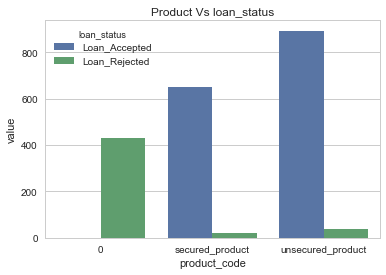

In [776]:
draw_barplot(data2, 'product_code','Type of Product', 'Product Vs loan_status')




Observation

> For the unsecured_product the proportion of loan Accepted is higher as compare to secured_product

> one who does have any product their loan has been rejected.




 Cross tab with count

loan_status    Loan_Accepted  Loan_Rejected
business_type                              
Manufacturing           1025            304
Services                   3              4
Trading                  515            182

 Cross tab with row % 

loan_status    Loan_Accepted  Loan_Rejected
business_type                              
Manufacturing          77.13          22.87
Services               42.86          57.14
Trading                73.89          26.11


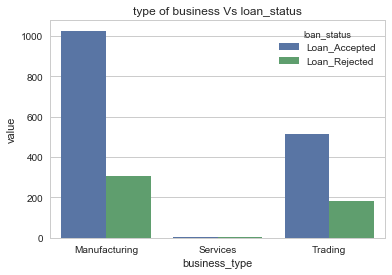

In [777]:
draw_barplot(data2, 'business_type','Type of Business', 'type of business Vs loan_status')


Observation

For people who are in the manufacturing sector their proportion of loan being Accepted is most higher followed by   trading

    People who works in  manufacturing sector apply more for loan as compare to other sector.
    
People who works in  Service  sector has least application for loan and their proportion of loan being rejected is   heigher.
    




 Cross tab with count

loan_status                    Loan_Accepted  Loan_Rejected
business_activity                                          
Job Work                                 186             62
Job Work & Sales                         464            144
Retail                                   299            111
Retail (Business to Business)              2              0
Retail (Business to Customer)              1              4
Sales                                    375             98
Whole Sale                               216             71

 Cross tab with row % 

loan_status                    Loan_Accepted  Loan_Rejected
business_activity                                          
Job Work                               75.00          25.00
Job Work & Sales                       76.32          23.68
Retail                                 72.93          27.07
Retail (Business to Business)         100.00           0.00
Retail (Business to Customer)          20.00       

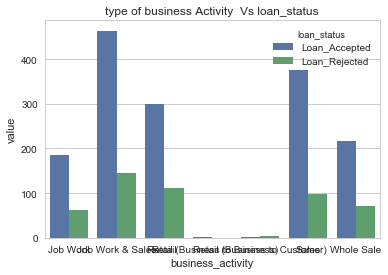

In [778]:
draw_barplot(data2, 'business_activity','Type of Business Activity', 'type of business Activity  Vs loan_status')

Observation

For people who are in the Retail (Business to Business) sector their proportion of loan being Accepted is 100 percent.


For people who are in the Retail (Business to Customer)  sector their proportion of loan being Rejected is heighest.

In [779]:
pd.crosstab(data2['business_sector'], data2['loan_status'], normalize='index').round(4)*100

loan_status,Loan_Accepted,Loan_Rejected
business_sector,,
Agriculture,64.71,35.29
Apparel,86.36,13.64
Auto Components,70.42,29.58
Automobiles,71.43,28.57
Bedding,100.00,0.00
Book Stores,80.00,20.00
Chemicals,70.00,30.00
Construction,78.05,21.95
Construction Material,72.73,27.27


Observation

For people who are in the (Education & Software & Tech ) sector their proportion of loan being Rejected is 100 percent.

For people who are in the (Bedding ,Home Furnishings & Metal works) sector their proportion of loan being Accepted is 100 percent.



 Cross tab with count

loan_status     Loan_Accepted  Loan_Rejected
ManagAgeui_APP                              
0                          64             10
20 & Below                  1              0
21-35                     628            210
36-50                     735            222
51-70                     115             48

 Cross tab with row % 

loan_status     Loan_Accepted  Loan_Rejected
ManagAgeui_APP                              
0                       86.49          13.51
20 & Below             100.00           0.00
21-35                   74.94          25.06
36-50                   76.80          23.20
51-70                   70.55          29.45


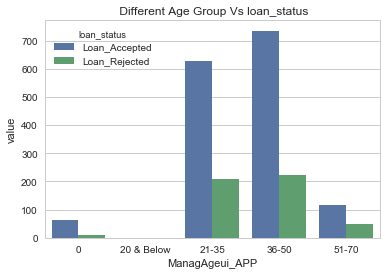

In [780]:
draw_barplot(data2, 'ManagAgeui_APP','Different Age Group', ' Different Age Group Vs loan_status')

Observation

    For the people who are in the age group of (20 & Below) their proportion of loan being Accepted is 100 percent.

    The proportion of loan being rejected is heigher for the age group of (51-70) 


In [781]:
pd.crosstab(data2['BusinFormalityOfTheBusinessui'], data2['loan_status'], normalize='index').round(4)*100

loan_status,Loan_Accepted,Loan_Rejected
BusinFormalityOfTheBusinessui,,
0,0.00,100.00
Cash & Banked,71.08,28.92
Cash & Non Banked,75.00,25.00
Invoice & Banked,80.16,19.84
Invoice & Non Banked,76.69,23.31


 Observation

For the people who does not have  either (bank account and cash) the proportion of loan rejected is 100 percent.

For the people who has (Invoice & Banked) the proportion of loan Accepted is heighest.

#### Analysis Of Credit Score Based On Different Factor

In [782]:
def draw_barplot(df, X, xlab, title):
    
    x       =   df[X]
    loan_statu     =   df['ManagCBscoreui_APP']

    ct = pd.crosstab(df[X], df['ManagCBscoreui_APP'])
    print("\n Cross tab with count\n")
    print(ct)

    ### Cross tab with row percentages
    print("\n Cross tab with row % \n")
    ct1 = pd.crosstab(df[X], df['ManagCBscoreui_APP'], normalize='index').round(4)*100
    print(ct1)

    # now stack and reset
    stacked = ct.stack().reset_index().rename(columns={0:'value'})

    # plot grouped bar chart
    ax = sns.barplot(x = stacked[X], y = stacked.value, hue=stacked.ManagCBscoreui_APP)
    ax.set_title(title)    
    plt.show()
    
                     


 Cross tab with count

ManagCBscoreui_APP    0   Fair credit  Bad credit  Excellent credit  \
product_code                                                          
secured_product     136            45          45               414   
unsecured_product   160            61          63               557   

ManagCBscoreui_APP  Good credit  
product_code                     
secured_product              38  
unsecured_product            52  

 Cross tab with row % 

ManagCBscoreui_APP      0   Fair credit  Bad credit  Excellent credit  \
product_code                                                            
secured_product     20.06          6.64        6.64             61.06   
unsecured_product   17.92          6.83        7.05             62.37   

ManagCBscoreui_APP  Good credit  
product_code                     
secured_product            5.60  
unsecured_product          5.82  


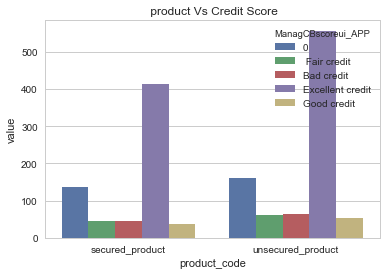

In [783]:
draw_barplot(data, 'product_code','Different product ', ' product Vs Credit Score')

 Observation

The proportion of exellent credit score is heighest for unsecured product as compare to secured product



 Cross tab with count

ManagCBscoreui_APP    0   Fair credit  Bad credit  Excellent credit  \
business_type                                                         
Manufacturing       205            67          69               661   
Services              2             0           0                 1   
Trading              89            39          39               309   

ManagCBscoreui_APP  Good credit  
business_type                    
Manufacturing                50  
Services                      0  
Trading                      40  

 Cross tab with row % 

ManagCBscoreui_APP      0   Fair credit  Bad credit  Excellent credit  \
business_type                                                           
Manufacturing       19.49          6.37        6.56             62.83   
Services            66.67          0.00        0.00             33.33   
Trading             17.25          7.56        7.56             59.88   

ManagCBscoreui_APP  Good credit  
business_type            

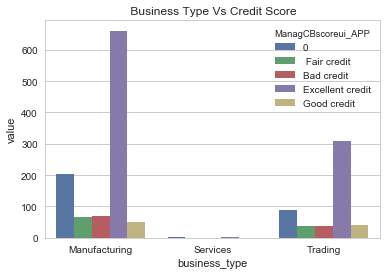

In [784]:
draw_barplot(data, 'business_type','Different Business ', ' Business Type Vs Credit Score')

 Observation

The Credit Score is heighest for manufacturing sector and lowest for service sector



 Cross tab with count

ManagCBscoreui_APP    0   Fair credit  Bad credit  Excellent credit  \
loan_status                                                           
Loan_Accepted       288           105         107               954   
Loan_Rejected        96            49          74               252   

ManagCBscoreui_APP  Good credit  
loan_status                      
Loan_Accepted                89  
Loan_Rejected                19  

 Cross tab with row % 

ManagCBscoreui_APP      0   Fair credit  Bad credit  Excellent credit  \
loan_status                                                             
Loan_Accepted       18.66           6.8        6.93             61.83   
Loan_Rejected       19.59          10.0       15.10             51.43   

ManagCBscoreui_APP  Good credit  
loan_status                      
Loan_Accepted              5.77  
Loan_Rejected              3.88  


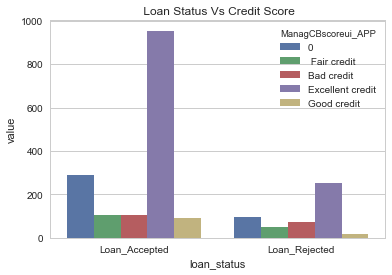

In [785]:
draw_barplot(data2, 'loan_status','Loan Status ', ' Loan Status Vs Credit Score')

 Observation

The Credit Score is heighest for the loan_accepted as compare to loan rejected.


In [786]:
features = data.columns
categorical_var = []

for feature in features : 
    if data[feature].dtype == 'O' : 
        data[feature] = data[feature].astype('category')
        categorical_var.append(feature)
                
    else :
        continue

In [787]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571 entries, 0 to 1570
Data columns (total 16 columns):
loan_id                          1571 non-null int64
account_number                   1571 non-null category
customer_id                      1571 non-null int64
enterprise_id                    1571 non-null int64
screening_date                   1571 non-null category
product_code                     1571 non-null category
hub_id                           1571 non-null int64
business_type                    1571 non-null category
business_activity                1571 non-null category
business_sector                  1571 non-null category
loan_status                      1571 non-null category
ManagAgeui_APP                   1571 non-null category
BusinFormalityOfTheBusinessui    1571 non-null category
ManagCBscoreui_APP               1571 non-null category
net_disbursement_magnitude       1571 non-null float64
transaction_Date                 1571 non-null category
dtypes: ca

### Dropping the 'Column' 

In [788]:
data2.head()

,loan_id,account_number,customer_id,enterprise_id,screening_date,product_code,hub_id,business_type,business_activity,business_sector,loan_status,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP
0,5692,TLMFS0000055,17850,6278,2017-03-07,secured_product,46,Manufacturing,Job Work,Auto Components,Loan_Accepted,21-35,Cash & Non Banked,0
1,6190,TLWCU0001219,17857,6280,2017-03-07,unsecured_product,32,Trading,Retail,Book Stores,Loan_Accepted,21-35,Cash & Non Banked,0
2,6191,TLAPS0000292,9481,2916,2017-03-07,secured_product,32,Manufacturing,Sales,Electricals,Loan_Accepted,21-35,Cash & Non Banked,0
3,9912,LCRIU0000028,6597,32,2017-04-01,unsecured_product,18,Manufacturing,Job Work & Sales,Auto Components,Loan_Accepted,36-50,Cash & Non Banked,Excellent credit
4,10500,LCRIU0000032,6597,32,2017-04-27,unsecured_product,18,Manufacturing,Job Work & Sales,Auto Components,Loan_Accepted,36-50,Cash & Non Banked,Excellent credit


In [789]:
data_clean=data2

In [790]:
data_clean.drop('account_number',axis = 1, inplace = True)

In [791]:
data_clean.drop('screening_date',axis = 1, inplace = True)

In [792]:
data_clean['loan_status']  = data_clean.loan_status.replace(['Loan_Accepted', 'Loan_Rejected'], [1, 0])

In [793]:
data_clean['loan_status'] = data_clean['loan_status'].replace(np.nan,0)

In [794]:
data_clean.loan_status.unique()

array([1, 0])

In [798]:
data_clean.head()

,loan_id,customer_id,enterprise_id,product_code,hub_id,business_type,business_activity,business_sector,loan_status,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP
0,5692,17850,6278,secured_product,46,Manufacturing,Job Work,Auto Components,1,21-35,Cash & Non Banked,0
1,6190,17857,6280,unsecured_product,32,Trading,Retail,Book Stores,1,21-35,Cash & Non Banked,0
2,6191,9481,2916,secured_product,32,Manufacturing,Sales,Electricals,1,21-35,Cash & Non Banked,0
3,9912,6597,32,unsecured_product,18,Manufacturing,Job Work & Sales,Auto Components,1,36-50,Cash & Non Banked,Excellent credit
4,10500,6597,32,unsecured_product,18,Manufacturing,Job Work & Sales,Auto Components,1,36-50,Cash & Non Banked,Excellent credit


#### Model building

In [799]:
X = data_clean[data_clean.columns.difference(['loan_status','account_number'])]


In [801]:
x=pd.get_dummies(X,drop_first=True)

In [812]:
x.head()

,customer_id,enterprise_id,hub_id,loan_id,BusinFormalityOfTheBusinessui_Cash & Banked,BusinFormalityOfTheBusinessui_Cash & Non Banked,BusinFormalityOfTheBusinessui_Invoice & Banked,BusinFormalityOfTheBusinessui_Invoice & Non Banked,ManagAgeui_APP_20 & Below,ManagAgeui_APP_21-35,...,business_sector_Plastics,business_sector_Printing,business_sector_Rubber,business_sector_Software & Tech,business_sector_Textiles,business_sector_Wood,business_type_Services,business_type_Trading,product_code_secured_product,product_code_unsecured_product
0,17850,6278,46,5692,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,17857,6280,32,6190,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,9481,2916,32,6191,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,6597,32,18,9912,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,6597,32,18,10500,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [796]:
y = data_clean['loan_status']

#### Split dataset into test and train datasets

In [804]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3, random_state = 56 )


In [808]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


In [814]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1423, 61) (1423,)
(610, 61) (610,)


In [819]:
## Building the Classifier
## Importing the Classification Tree Package
from sklearn import tree

## Creating the Classifier Object
clf = tree.DecisionTreeClassifier()

## Fitting the Classification Tree on Training Dataset
clf = clf.fit(x_train, y_train)



In [820]:
feature_importance = pd.DataFrame([x_train.columns,
                               clf.tree_.compute_feature_importances()])
feature_importance.T .head(20)

,0,1
0,customer_id,0.019095
1,enterprise_id,0.0234549
2,hub_id,0.0330005
3,loan_id,0.0230576
4,BusinFormalityOfTheBusinessui_Cash & Banked,0.000622778
5,BusinFormalityOfTheBusinessui_Cash & Non Banked,0.0118427
6,BusinFormalityOfTheBusinessui_Invoice & Banked,0
7,BusinFormalityOfTheBusinessui_Invoice & Non Ba...,0.000507038
8,ManagAgeui_APP_20 & Below,0
9,ManagAgeui_APP_21-35,0.00855204


In [821]:
pred_y_train = clf.predict(x_train)
pred_y_train


array([1, 1, 1, ..., 1, 1, 1])

In [822]:
## Predict based on the Classifier
pred_y_test = clf.predict(x_test)
pred_y_test


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [823]:
## Let us see the classification accuracy of our model
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, pred_y_test)
score


0.940983606557377

Accuracy of our Model on Test Data is (94 %)

In [829]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,x_train,y_train,cv=5))

0.9360588089943167

In [830]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,x_test,y_test,cv=5))

0.9524590163934425

##### Visualize the tree

In [824]:
import pydotplus
import io
from sklearn.tree import export_graphviz
from scipy import misc
from matplotlib import pyplot as plt
feature_list = list(x_train.columns.values)
f = io.StringIO()
dot_data = export_graphviz(clf, out_file = f,
                feature_names=feature_list)
pydot_graph = pydotplus.graph_from_dot_data(f.getvalue())

/Users/sanaam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


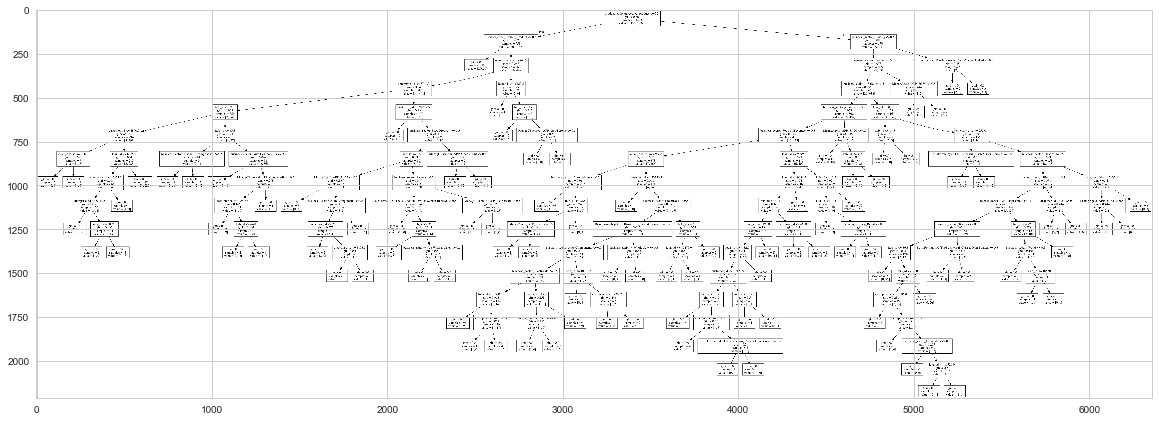

In [825]:
pydot_graph.write_png("decision_tree.png")
img = misc.imread("decision_tree.png")
plt.rcParams["figure.figsize"]=(20,20)
plt.imshow(img)